In [1]:
import numpy as np
import pandas as pd

# from atomic_forces.average_atom.python.average_atom import NeutralPseudoAtom as NPA
from atomic_forces.average_atom.python.average_atom_geometric import NeutralPseudoAtom as NPA
# from atomic_forces.average_atom.python.average_atom_geometric import load_NPA
from atomic_forces.average_atom.python.misc import jacobi_relaxation, sor
from atomic_forces.average_atom.python.grids import NonUniformGrid
# from atomic_forces.average_atom.python.average_atom import load_NPA
from atomic_forces.average_atom.python.physics import ThomasFermi, FermiDirac

from importlib import reload
try:
    reload(physics)
    reload(grids)
    reload(average_atom_geometric)
#     reload(average_atom)
    reload(misc)
except NameError as e:
    from atomic_forces.average_atom.python import physics as physics
    from atomic_forces.average_atom.python import average_atom_geometric as average_atom_geometric
#     from atomic_forces.average_atom.python import average_atom as average_atom
    from atomic_forces.average_atom.python import misc as misc
    from atomic_forces.average_atom.python import grids as grids
    print("Error: ",e)
except Exception as e:
    print("Unexpected error during reload")
    print(e)


import matplotlib.pyplot as plt

from hnc.hnc.constants import *
from hnc.hnc.misc import rs_from_n, n_from_rs

import cProfile

plt.rcParams.update({'font.size': 14})
plt.rcParams["figure.figsize"] = (8,6)
plt.rcParams['xtick.labelsize']=14


ModuleNotFoundError: No module named 'mendeleev'
Error:  name 'physics' is not defined


In [179]:
# Aluminum
name='Al'
Z, A = 13, 27 

Ti_eV = 1 
Te_eV = 1

Te_AU = Te_eV*eV_to_AU
Ti_AU = Ti_eV*eV_to_AU

rs = 2.985767276908717


# Hydrogen
# name='H'
# Z, A = 1, 1.00784

# Te_eV = 2 
# Te_AU = Te_eV*eV_to_AU

# Ti_eV = 2
# Ti_AU = Ti_eV*eV_to_AU

# ρ_gpercc = 1
# ni_invcc = ρ_gpercc/(A*amu_to_AU*AU_to_g)
# ni_AU = ni_invcc*invcc_to_AU
# rs = rs_from_n(ni_AU)


####
R = 20*rs

aa_tfd = NPA(Z, A, Ti_AU, Te_AU, rs, rs, initialize=True, gradient_correction=None, μ_init = 0.158, Zstar_init = 'More', rmin=2e-3 ,Npoints=600,
             name=name, ignore_vxc=False, fixed_Zstar=False, iet_R_over_rs=R/rs, use_full_ne_for_nf=False)
npa_tfd = NPA(Z, A, Ti_AU, Te_AU, rs, R, initialize=True, gradient_correction=None, μ_init = 0.158, Zstar_init = 'More', rmin=1e-2 ,Npoints=2000, 
              name=name,ignore_vxc=False, fixed_Zstar=False, iet_R_over_rs=R/rs*3, use_full_ne_for_nf=False)

________________________
Generating NPA
Using More TF fit for initial Zstar = 2.501
	Intializing grid
	Creating Integral Equation Solver
Intialized Potentials and Densities
________________________
Generating NPA
Using More TF fit for initial Zstar = 2.501
	Intializing grid
	Creating Integral Equation Solver
	-------------------
	Solving IET.
0: Initial condition Total Error: 3.110e+01
Exiting status 0, reverting to best index so far: 1208
Final iter:1209, Total Error: 9.881e-13
Intialized Potentials and Densities


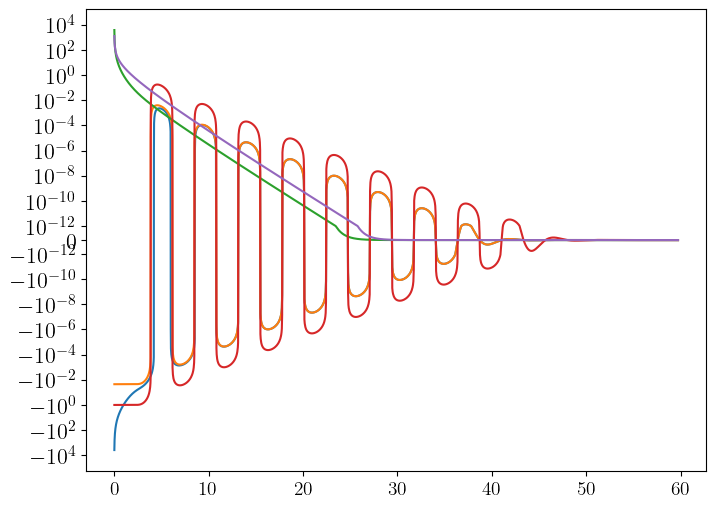

In [121]:
fig, ax = plt.subplots(figsize=(8,6))

ax.plot(npa_tfd.grid.xs, npa_tfd.ρi - npa_tfd.ne)
ax.plot(npa_tfd.grid.xs, npa_tfd.ρi - npa_tfd.ρi[-1])
ax.plot(npa_tfd.grid.xs, npa_tfd.ne - npa_tfd.ne[-1])
ax.plot(npa_tfd.grid.xs, (npa_tfd.gii_initial-1))
ax.plot(npa_tfd.grid.xs, (npa_tfd.φe + npa_tfd.φion))


ax.set_yscale('symlog', linthresh=1e-12)

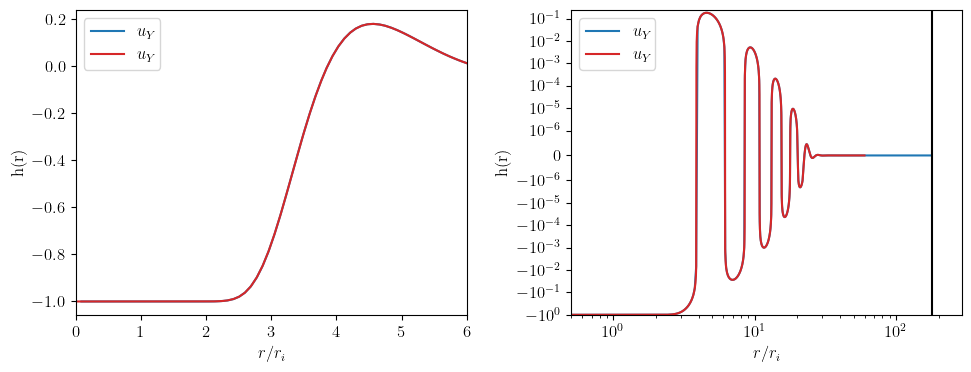

In [180]:
fig, axs  = plt.subplots(1,2,figsize=(10,4))

colors = plt.rcParams['axes.prop_cycle'].by_key()['color']

short_distance_weight = np.exp(-(0.08*npa_tfd.kTF*npa_tfd.grid.xs)**4)
for ax in axs:
    ax.plot(npa_tfd.iet.r_array*rs, npa_tfd.iet.h_r_matrix[0,0], color=colors[0], label=r"$u_Y$")
    # ax.plot(aa_tfd.iet.r_array*rs, aa_tfd.iet.h_r_matrix[0,0],color=colors[1],  label=r"$u_Y$")
    ax.plot(npa_tfd.grid.xs, (npa_tfd.gii-1),'-',color=colors[3],  label=r"$u_Y$")
    # ax.plot(npa_tfd.grid.xs, short_distance_weight*(npa_tfd.gii-1),'--',color=colors[3],  label=r"$u_Y$ damped")
    			

    # ax.plot(aa_tfd.grid.xs, aa_tfd.gii-1,'--',color=colors[3],  label=r"$u_Y$")
    ax.axvline(npa_tfd.iet.r_array[-1]*rs,color='k')
    
ax = axs[0]
ax.set_xlabel(r"$r/r_i$",fontsize=12)
ax.set_ylabel("h(r)",fontsize=12)
ax.set_xlim(0,6)

ax = axs[1]
ax.set_xlabel(r"$r/r_i$",fontsize=12)
ax.set_ylabel("h(r)",fontsize=12)
ax.set_xscale('log')
ax.set_xlim(0.5,None)
ax.set_yscale('symlog', linthresh=1e-6)
for ax in axs:
    ax.legend(fontsize=12)
    ax.tick_params(labelsize=12)


plt.tight_layout()



### Thomas Fermi (TF)

In [181]:
aa_tfd.solve_TF(verbose=True, picard_alpha=2e-1, tol=1e-7)

Beginning self-consistent electron solver.
_________________________________
__________________________________________
TF Iteration 0
	mu =    -0.0344, change: 1.2178e+00 (converged=False)
	Poisson Err = -4.425e-12, rho Err =  4.061e-01
	Q =  0.000e+00 -> -2.830e-01, 
	Zstar guess =  2.896e+00. Current Zstar:  2.580e+00 (converged=False)
	Change =  1.736e+00
	L_decay =  3.806e+00
__________________________________________
TF Iteration 1
	mu =     0.1456, change: 5.2333e+00 (converged=False)
	Poisson Err = -3.982e-12, rho Err =  3.378e-01
	Q = -2.830e-01 -> -2.871e-01, 
	Zstar guess =  3.276e+00. Current Zstar:  2.719e+00 (converged=False)
	Change =  1.318e+00
	L_decay =  3.771e+00
__________________________________________
TF Iteration 2
	mu =     0.2210, change: 5.1738e-01 (converged=False)
	Poisson Err = -4.366e-12, rho Err =  2.739e-01
	Q = -2.871e-01 -> -2.967e-01, 
	Zstar guess =  3.333e+00. Current Zstar:  2.842e+00 (converged=False)
	Change =  3.879e-01
	L_decay =  3.742e+00
__

True

In [124]:
npa_tfd.solve_TF(verbose=True, picard_alpha=0.1, tol=1e-7, nmax = 1e3)

Beginning self-consistent electron solver.
_________________________________
__________________________________________
TF Iteration 0
	mu =     0.3778, change: 1.3911e+00 (converged=False)
	Poisson Err =        nan, rho Err =  4.436e-01
	Q =  0.000e+00 ->  3.638e-12, 
	Zstar guess =  0.000e+00. Current Zstar:  2.502e+00 (converged=False)
	Change =  1.184e+00
	L_decay =  3.827e+00


/home/zach/plasma/atomic_forces/average_atom/python/average_atom_geometric.py:525: RuntimeWarning: divide by zero encountered in divide
  
/home/zach/plasma/atomic_forces/average_atom/python/average_atom_geometric.py:525: RuntimeWarning: invalid value encountered in divide
  


__________________________________________
TF Iteration 1
	mu =     0.3777, change: 1.5842e-04 (converged=True)
	Poisson Err =  2.282e-11, rho Err =  1.922e-01
	Q =  3.638e-12 ->  3.638e-12, 
	Zstar guess =  0.000e+00. Current Zstar:  2.502e+00 (converged=False)
	Change =  7.197e-02
	L_decay =  3.827e+00
__________________________________________
TF Iteration 2
	mu =     0.3777, change: 1.4524e-04 (converged=True)
	Poisson Err =  1.567e-10, rho Err =  1.256e-01
	Q =  3.638e-12 ->  3.638e-12, 
	Zstar guess =  0.000e+00. Current Zstar:  2.501e+00 (converged=False)
	Change =  6.044e-02
	L_decay =  3.827e+00
__________________________________________
TF Iteration 3
	mu =     0.3776, change: 1.2116e-04 (converged=True)
	Poisson Err =  1.122e-10, rho Err =  5.670e-02
	Q =  3.638e-12 ->  3.638e-12, 
	Zstar guess =  0.000e+00. Current Zstar:  2.501e+00 (converged=False)
	Change =  5.979e-02
	L_decay =  3.827e+00
__________________________________________
TF Iteration 4
	mu =     0.3776, change

False

In [182]:
aa_tfd.set_uii_eff(), npa_tfd.set_uii_eff()

	-------------------
	Solving IET.
0: Initial condition Total Error: 2.272e+02
Exiting status 0, reverting to best index so far: 3590
Final iter:3591, Total Error: 9.942e-13
	-------------------
	Solving IET.
0: Initial condition Total Error: 1.017e+19
QUIT: Total error infinite.
Exiting status 1, reverting to best index so far: 0
Final iter:21, Total Error: 1.017e+19


/home/zach/plasma/hnc/hnc/hnc.py:650: RuntimeWarning: overflow encountered in exp
  hnc_err = np.linalg.norm(- 1 - self.h_r_matrix   + np.exp( -self.βu_r_matrix + self.h_r_matrix - self.c_r_matrix ))/np.sqrt(self.N_bins*self.N_species**2)
/home/zach/plasma/hnc/hnc/hnc.py:434: RuntimeWarning: overflow encountered in exp
  tot_eqn =  1 + h_r_matrix  - np.exp(-self.βu_s_r_matrix + h_r_matrix - c_s_r_matrix )
/home/zach/plasma/hnc/hnc/hnc.py:520: RuntimeWarning: overflow encountered in exp
  h_r_matrix = -1 + np.exp(γs_r_matrix - self.βu_s_r_matrix) # 2. γ_r,u_s_r  -> h_r   (HNC)
/home/zach/plasma/hnc/hnc/hnc.py:658: RuntimeWarning: invalid value encountered in subtract
  Δ_err = np.array(self.tot_err_list[-iters_to_check:-2]) - np.array(self.tot_err_list[-iters_to_check + 1:-1])


(None, None)

### EOS

In [149]:
def get_E(aa):
    βVeff = aa.get_βVeff(aa.φe, aa.ne, aa.ne_bar)
    η = aa.μ/aa.Te - βVeff
    βU = aa.grid.integrate_f(βVeff*aa.ne)
    I_onehalf = FermiDirac.Ionehalf(η)
    I_threehalf = FermiDirac.Ithreehalf(η)
    
    βK = (2*aa.Te)**1.5/π**2 * aa.grid.integrate_f( η*I_onehalf - 2/3 * I_threehalf   )
    return βU, βK, βU + βK

get_E(aa_tfd), get_E(npa_tfd)

((-12598.4970953555, 15268.40195153826, 2669.9048561827603),
 (-10485.204108196704, 571558.3756027052, 561073.1714945085))

In [183]:
def get_P(aa):
    aa_old_βu = aa.iet.βu_r_matrix.copy()
    # aa.iet.set_βu_matrix( np.array([[1/aa.Ti * aa.Zstar**2/(aa_tfd.iet.r_array*aa_tfd.rs) ]] ))
    P_id_hnc, P_ex_hnc, P_hnc = aa.iet.ideal_pressure(), aa.iet.excess_pressure(), aa.iet.total_pressure()
    P_id_AU, P_ex_AU, P_AU  = P_id_hnc/rs**3, P_ex_hnc/rs**3, P_hnc/rs**3
    aa.iet.set_βu_matrix(aa_old_βu)
    return P_id_AU, P_ex_AU, P_AU

aa_P_ions = get_P(aa_tfd)
aa_P_ions[1]/aa_P_ions[0]

10.943124438137678

## Comparison

(<Figure size 2000x800 with 2 Axes>,
 array([<Axes: xlabel='$|r-R_1|$ [A.U.]', ylabel='$\\phi$ [A.U.]'>,
        <Axes: xlabel='$|r-R_1|$ [A.U.]', ylabel='$n$ [A.U.]'>],
       dtype=object))

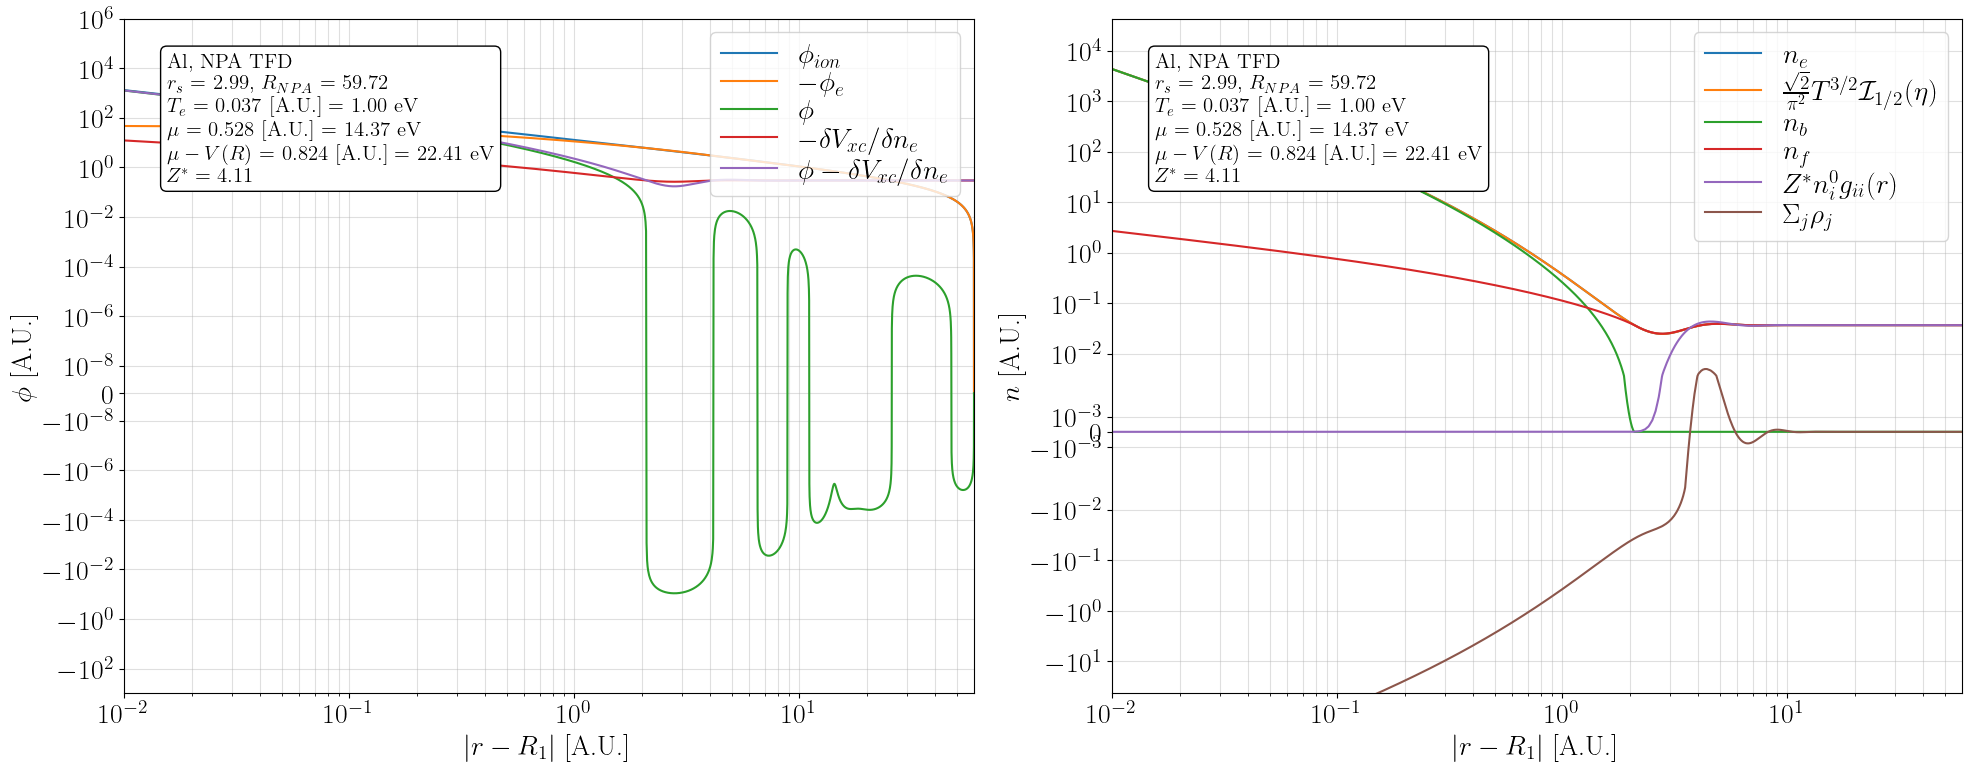

In [126]:
npa_tfd.make_plots()

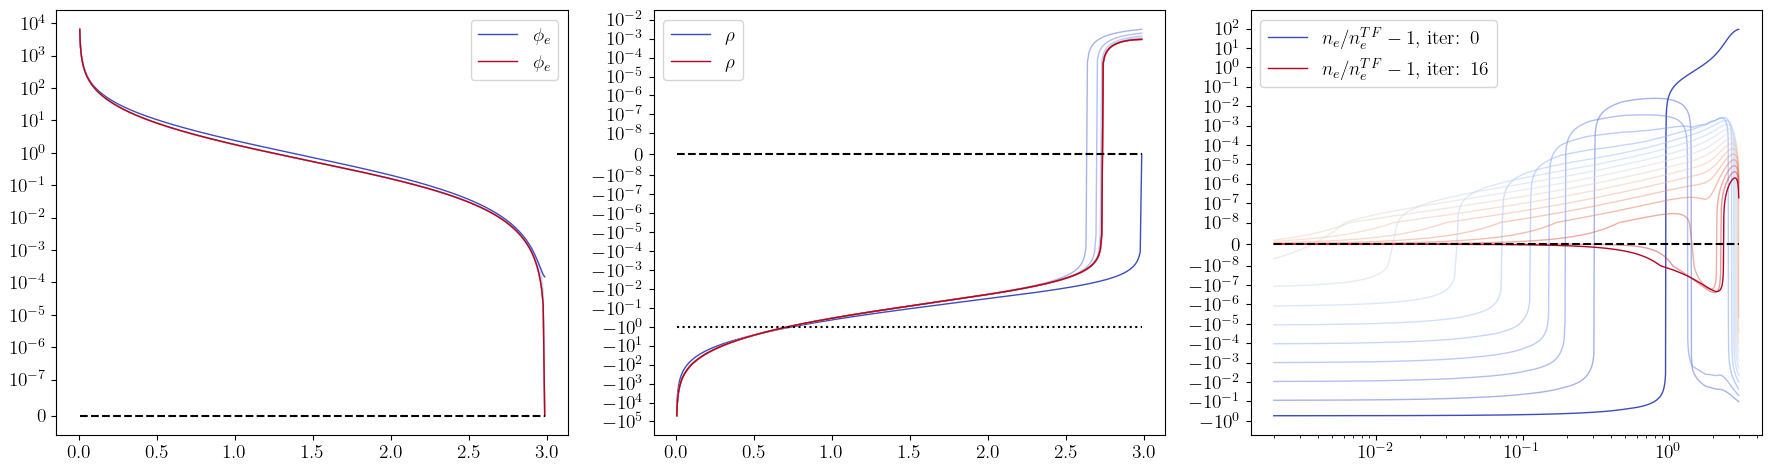

In [127]:
def plot_convergence(aa, axs=None):
    if axs is None:
        fig, axs = plt.subplots(ncols=3,figsize=(18,5),facecolor='w')
    
    # ELectric potential
    slice_by_num = 10
    ax = axs[0]
    colors = plt.cm.coolwarm(np.linspace(0, 1,len(aa.φe_list[::slice_by_num])))
    for i, φe in enumerate(aa.φe_list[::slice_by_num]):
        if i ==0 or i==len(aa.φe_list[::slice_by_num])-1:
            ax.plot(aa.grid.xs, (φe+aa.φion),linewidth=1,color=colors[i],alpha=1, label=r'$\phi_e$'.format(i))
        else:
            ax.plot(aa.grid.xs, φe+aa.φion,linewidth=1,color=colors[i],alpha=0.2)
    # ax.plot(aa.grid.xs, aa.get_φe( (aa.ρi - aa.ne) )[0] + aa.φion  ,'k:', label=r'$\phi$ check') 
    ax.set_yscale('symlog',linthresh=1e-7)

    # number density
    ax = axs[1]
    for i, (ne, ρi) in enumerate(zip(aa.ne_list[::slice_by_num], aa.ρi_list[::slice_by_num])):
        if i ==0 or i==len(aa.ne_list[::slice_by_num])-1:
            if i==0: ne_bar_0 = ne[-1]
            # ax.plot(aa.grid.xs, -ne + 0*ρi + ne[-1],linewidth=1,color=colors[i],alpha=1, label=r'$\rho$'.format(i))
            # ax.plot(aa.grid.xs, -ne + ρi,linewidth=1,color=colors[i],alpha=1, label=r'$\rho$'.format(i))
            ax.plot(aa.grid.xs, -ne + ne_bar_0,linewidth=1,color=colors[i],alpha=1, label=r'$\rho$'.format(i))
            # ax.plot(aa.grid.xs, -ρi[-1] + ρi,linewidth=1,color=colors[i],alpha=1, label=r'$\rho$'.format(i))
            pass
        else:
            # print(ne[-1]-ne_bar_0)
            # ax.plot(aa.grid.xs, -ne + ρi ,linewidth=1,linestyle='-',color=colors[i],alpha=0.5)
            ax.plot(aa.grid.xs, -ne + ne_bar_0 ,linewidth=1,linestyle='-',color=colors[i],alpha=0.5)
            # ax.plot(aa.grid.xs, -ρi[-1]+ ρi ,linewidth=1,linestyle='-',color=colors[i],alpha=0.5)

    
    ax.plot(aa.grid.xs, (aa.gii)-1, 'k:')
    ax.set_yscale('symlog',linthresh=1e-8)

            
    # number density
    ax = axs[2]
    for i, (φe, ne, μ, ne_bar) in enumerate(zip(aa.φe_list[::slice_by_num], aa.ne_list[::slice_by_num], aa.μ_list[::slice_by_num],aa.ne_bar_list[::slice_by_num])):
        ne_TF = aa.get_ne_TF(φe, ne, μ, ne_bar)
        if i ==0 or i==len(aa.ne_list[::slice_by_num])-1:
            ax.plot(aa.grid.xs, ne/ne_TF-1,linewidth=1,color=colors[i],alpha=1, label=r'$n_e/n_e^{{TF}}-1$, iter: {0}'.format(i))
            # ax.plot(aa.grid.xs, ne-ne[-1],linewidth=1,color=colors[i],alpha=1, label=r'$n_e/n_e^{{TF}}-1$, iter: {0}'.format(i))
            pass
        else:
            ax.plot(aa.grid.xs, ne/ne_TF-1, linewidth=1,linestyle='-',color=colors[i],alpha=0.5)
            # ax.plot(aa.grid.xs, ne-ne[-1], linewidth=1,linestyle='-',color=colors[i],alpha=0.5)
            # print(np.abs(ne/ne_TF-1))
            # print(np.where( np.abs(ne/ne_TF-1)>1e-6 ))
            # print(aa.grid.xs[np.where( np.abs(ne/ne_TF-1) > 1e-8)][0]/10, 1/(np.sum(aa.grid.xs*np.abs(ne/ne_TF-1))/np.sum(np.abs(ne/ne_TF-1))))

    ax.set_yscale('symlog',linthresh=1e-8)
    ax.set_xscale('log')
    for ax in axs:
        ax.legend(fontsize=14)
        ax.tick_params(labelsize=14)
        ax.plot(aa.grid.xs, np.zeros_like(aa.ne),'k--')
    plt.tight_layout()
plot_convergence(aa_tfd)
# plot_convergence(npa_tfd)

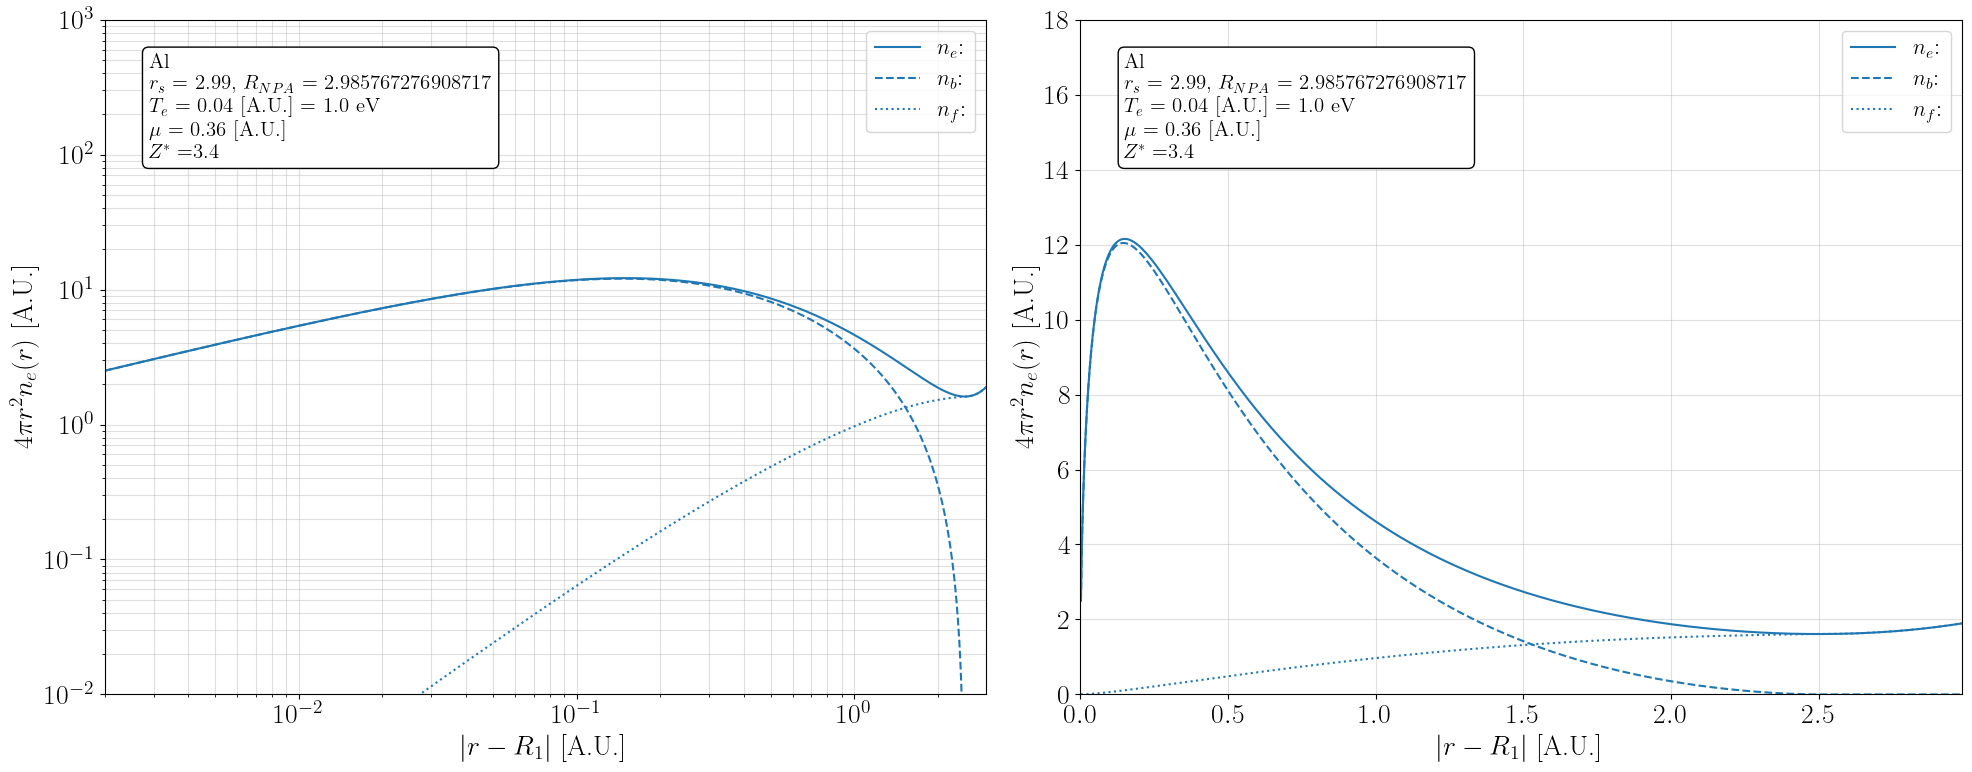

In [128]:

colors = plt.rcParams['axes.prop_cycle'].by_key()['color']

def make_plot_bound_free(aa, axs=None, name='', color=colors[0]):
    eV = 0.0367512 # So 4 eV = 4 * 0.036.. in natural units
    if axs is None:
        fig, axs = plt.subplots(ncols=2,figsize=(20,8),facecolor='w')

    # Density * 4pi r^2 plot
    factor = 4*np.pi*aa.grid.xs**2
    axs[0].plot(aa.grid.xs, aa.ne*factor ,'-',color=color, label=r'$n_e$: '+ name)
    axs[0].plot(aa.grid.xs, aa.n_b*factor,'--',color=color,  label=r'$n_b$: ' + name)
    axs[0].plot(aa.grid.xs, aa.n_f*factor,':',color=color,  label=r'$n_f$: ' + name)
    if aa.rs != aa.R:
        axs[0].plot(aa.grid.xs, aa.ρi*factor,'-',color='r',  label=r'$\rho_i$: ' + name)
        axs[0].plot(aa.grid.xs, (aa.ρi-aa.ne)*factor,'--',color='r',  label=r'$\rho_i+\rho_e$: ' + name)
    # axs[0].plot(aa.grid.xs, aa.δn_f*factor,'--',color='g',  label=r'$n_e^{sc}$: ' + name)


    axs[0].set_ylabel(r'$4 \pi r^2 n_e(r) $ [A.U.]',fontsize=20)
    axs[0].set_ylim(1e-2, 1e3)
    axs[0].set_yscale('log')#,linthresh=1e-6)
    axs[0].set_xscale('log')
    axs[0].set_xlim(aa.grid.xs[0],aa.grid.xs[-1])

    
    # Density * 4pi r^2 plot
    factor = 4*np.pi*aa.grid.xs**2
    axs[1].plot(aa.grid.xs, aa.ne*factor ,'-',color=color, label=r'$n_e$: '+ name)
    axs[1].plot(aa.grid.xs, aa.n_b*factor,'--',color=color,  label=r'$n_b$: ' + name)
    axs[1].plot(aa.grid.xs, aa.n_f*factor,':',color=color,  label=r'$n_f$: ' + name)
    if aa.rs != aa.R:
        axs[1].plot(aa.grid.xs, aa.ρi*factor,'-',color='r',  label=r'$\rho_i$: ' + name)
        axs[1].plot(aa.grid.xs, (aa.ρi-aa.ne)*factor,'--',color='r',  label=r'$\rho_i+\rho_e$: ' + name)


    axs[1].set_ylabel(r'$4 \pi r^2 n_e(r) $ [A.U.]',fontsize=20)
    axs[1].set_ylim(0, 18)
    axs[1].set_xlim(0,aa.R)

        
    for ax in axs:
        ax.set_xlabel(r'$|r-R_1|$ [A.U.]',fontsize=20)
        ax.legend(loc="upper right",fontsize=20,labelspacing = 0.1)
        ax.tick_params(labelsize=20)
        ax.grid(which='both',alpha=0.4)

        # make textbox
        text = ("{0}\n".format(aa.name)+ 
            r"$r_s$ = " + "{0},    ".format(np.round(aa.rs,2)) +
            r"$R_{NPA}$ = " + "{0}\n".format(aa.R)  +
                r"$T_e$ = " + "{0} [A.U.] = {1} eV\n".format(np.round(aa.Te,2),np.round(aa.Te/eV,2)) + r"$\mu$ = " + "{0} [A.U.]\n".format(np.round(aa.μ,2)) +
                r"$Z^\ast = $" + "{0}".format(np.round(aa.Zstar,2))  )

        props = dict(boxstyle='round', facecolor='w')
        ax.text(0.05,0.95, text, fontsize=15, transform=ax.transAxes, verticalalignment='top', bbox=props)

    plt.tight_layout()
    name = "NPA_densities_{0}_rs{1}_{2}eV_R{3}.png".format(aa.name, np.round(aa.rs,2), np.round(aa.Te/eV,2) ,np.round(aa.R))
    plt.savefig("/home/zach/plasma/atomic_forces/average_atom/media/" + name, dpi=300, bbox_inches='tight',facecolor="w")
    
    
    return axs


axs = make_plot_bound_free(aa_tfd, color=colors[0])
for ax in axs:
    handles, labels = ax.get_legend_handles_labels()
    by_label = dict(zip(labels, handles))
    ax.legend(by_label.values(), by_label.keys(), fontsize=16, loc='upper right')
# axs[1].set_ylim(1e-5,1e3)

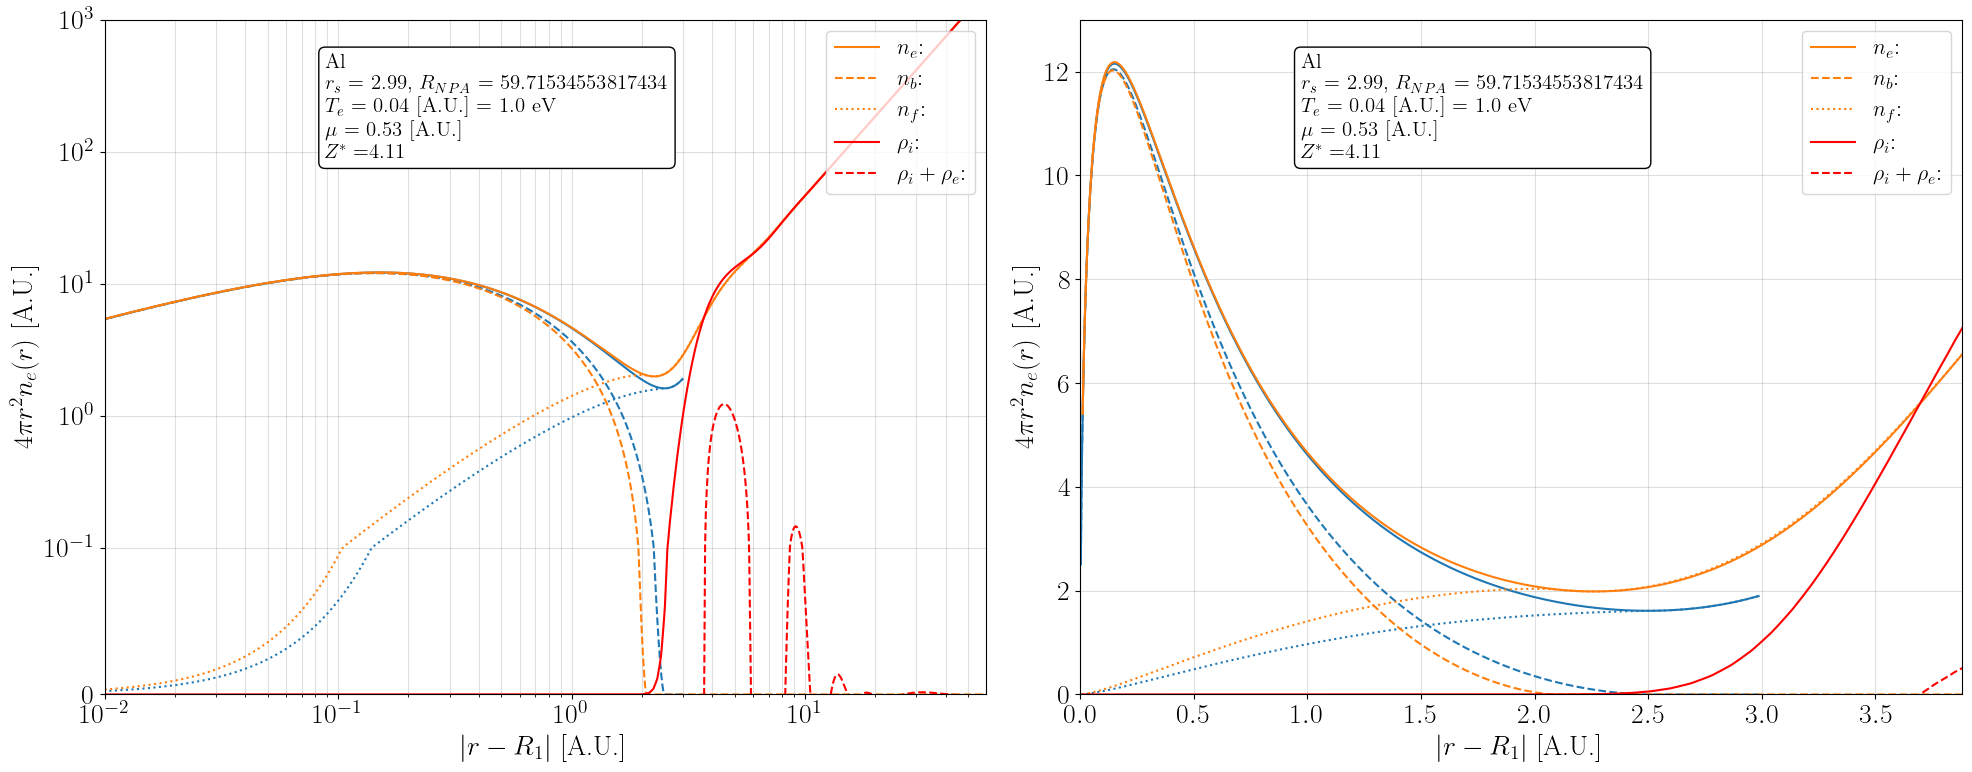

In [129]:

colors = plt.rcParams['axes.prop_cycle'].by_key()['color']

def compare_aa(aa_list, axs=None, name=''):
    eV = 0.0367512 # So 4 eV = 4 * 0.036.. in natural units
    if axs is None:
        fig, axs = plt.subplots(ncols=2,figsize=(20,8),facecolor='w')

    # Density * 4pi r^2 plot
    for ax in axs:
        for aa, color in zip( aa_list, colors):
            factor = 4*np.pi*aa.grid.xs**2
            # ax.plot(aa.petrov.r_data, 4*np.pi*aa.petrov.r_data**2*(aa.petrov.rho_data + aa.petrov.rho_0), 'k-', label="Petrov AA")
            ax.plot(aa.grid.xs, aa.ne*factor ,'-',color=color, label=r'$n_e$: '+ name)
            ax.plot(aa.grid.xs, aa.n_b*factor,'--',color=color,  label=r'$n_b$: ' + name)
            ax.plot(aa.grid.xs, aa.n_f*factor,':',color=color,  label=r'$n_f$: ' + name)
            if aa.rs != aa.R:
                ax.plot(aa.grid.xs, aa.ρi*factor,'-',color='r',  label=r'$\rho_i$: ' + name)
                ax.plot(aa.grid.xs, (aa.ρi-aa.ne)*factor,'--',color='r',  label=r'$\rho_i+\rho_e$: ' + name)
        # axs[0].plot(aa.grid.xs, aa.δn_f*factor,'--',color='g',  label=r'$n_e^{sc}$: ' + name)


    axs[0].set_ylabel(r'$4 \pi r^2 n_e(r) $ [A.U.]',fontsize=20)
    axs[0].set_ylim(0, 1e3)
    axs[0].set_yscale('symlog',linthresh=1e-1)
    axs[0].set_xscale('log')
    axs[0].set_xlim(aa.grid.xs[0],aa.grid.xs[-1])

    axs[1].set_ylabel(r'$4 \pi r^2 n_e(r) $ [A.U.]',fontsize=20)
    axs[1].set_ylim(0, 13)
    axs[1].set_xlim(0, np.min([aa.R,1.3*aa.rs]))

        
    for ax in axs:
        ax.set_xlabel(r'$|r-R_1|$ [A.U.]',fontsize=20)
        ax.legend(loc="upper right",fontsize=20,labelspacing = 0.1)
        ax.tick_params(labelsize=20)
        ax.grid(which='both',alpha=0.4)

        # make textbox
        text = ("{0}\n".format(aa.name)+ 
            r"$r_s$ = " + "{0},    ".format(np.round(aa.rs,2)) +
            r"$R_{NPA}$ = " + "{0}\n".format(aa.R)  +
                r"$T_e$ = " + "{0} [A.U.] = {1} eV\n".format(np.round(aa.Te,2),np.round(aa.Te/eV,2)) + r"$\mu$ = " + "{0} [A.U.]\n".format(np.round(aa.μ,2)) +
                r"$Z^\ast = $" + "{0}".format(np.round(aa.Zstar,2))  )

        props = dict(boxstyle='round', facecolor='w')
        ax.text(0.25,0.95, text, fontsize=15, transform=ax.transAxes, verticalalignment='top', bbox=props)

    plt.tight_layout()
    name = "NPA_densities_{0}_rs{1}_{2}eV_R{3}.png".format(aa.name, np.round(aa.rs,2), np.round(aa.Te/eV,2) ,np.round(aa.R))
    plt.savefig("/home/zach/plasma/atomic_forces/average_atom/media/" + name, dpi=300, bbox_inches='tight',facecolor="w")
    
    
    return axs


axs = compare_aa([aa_tfd, npa_tfd])
for ax in axs:
    handles, labels = ax.get_legend_handles_labels()
    by_label = dict(zip(labels, handles))
    ax.legend(by_label.values(), by_label.keys(), fontsize=16, loc='upper right')
# axs[1].set_ylim(1e-5,1e3)

## HNC and FT

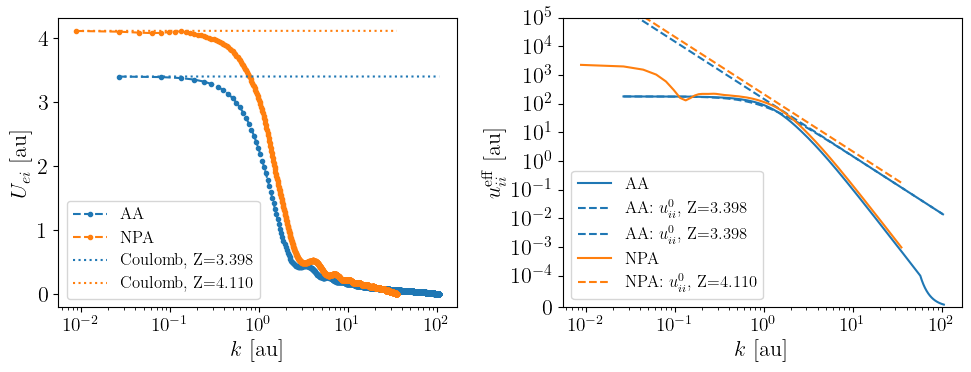

In [130]:
plt.rcParams["figure.figsize"] = (8,6)
plt.rcParams['font.size'] =  16
plt.rcParams['legend.fontsize'] = 12
# Plot and Compare
fig, axs = plt.subplots(1,2, figsize=(10,4))

colors = plt.rcParams['axes.prop_cycle'].by_key()['color']

axs[0].plot(aa_tfd.iet.k_array/rs, aa_tfd.Uei_iet_k*(aa_tfd.iet.k_array/rs)**2/(4*π) ,'--.',color=colors[0], label="AA" ) # Need to muultiply by some rs power???
axs[0].plot(npa_tfd.iet.k_array/rs, npa_tfd.Uei_iet_k*(npa_tfd.iet.k_array/rs)**2/(4*π) ,'--.',color=colors[1], label="NPA") # Need to muultiply by some rs power???
axs[0].plot(aa_tfd.iet.k_array/rs, aa_tfd.Zstar*np.ones_like(aa_tfd.iet.k_array),':', color=colors[0], label=f"Coulomb, Z={aa_tfd.Zstar:0.3f}")
axs[0].plot(npa_tfd.iet.k_array/rs, npa_tfd.Zstar*np.ones_like(npa_tfd.iet.k_array),':',color=colors[1], label=f"Coulomb, Z={npa_tfd.Zstar:0.3f}")

# axs[0].set_yscale('log')
axs[0].set_xscale('log')
axs[0].set_xlabel(r"$k$ [au]")
axs[0].set_ylabel(r"$U_{ei}$ [au]")

axs[1].plot(aa_tfd.iet.k_array/rs, aa_tfd.uii_k_eff_iet,'-', color=colors[0], label="AA")
axs[1].plot(aa_tfd.iet.k_array/rs, 4*π*aa_tfd.Zstar**2/(aa_tfd.iet.k_array/rs)**2,'--', color=colors[0], label=r"AA: $u_{{ii}}^0$, Z={0:0.3f}".format(aa_tfd.Zstar))
axs[1].plot(aa_tfd.iet.k_array/rs, 1/(aa_tfd.iet.k_array**2/rs**2/(4*π*aa_tfd.Zstar**2) + 1/aa_tfd.uii_k_eff_iet[0] ),'--', color=colors[0], label=r"AA: $u_{{ii}}^0$, Z={0:0.3f}".format(aa_tfd.Zstar))
# axs[1].plot(aa_tfd.iet.k_array/rs, uii_test,'--', color=colors[0], label=r"AA: $u_{{ii}}^0$, Z={0:0.3f}".format(aa_tfd.Zstar))


axs[1].plot(npa_tfd.iet.k_array/rs, npa_tfd.uii_k_eff_iet,color=colors[1], label="NPA")
axs[1].plot(npa_tfd.iet.k_array/rs, 4*π*npa_tfd.Zstar**2/(npa_tfd.iet.k_array/rs)**2,'--', color=colors[1], label=r"NPA: $u_{{ii}}^0$, Z={0:0.3f}".format(npa_tfd.Zstar))



axs[1].set_yscale('symlog',linthresh=1e-4)
axs[1].set_ylim(0,1e5)
axs[1].set_xscale('log')
axs[1].set_xlabel(r"$k$ [au]")
axs[1].set_ylabel(r"$u^{\rm eff}_{ii}$ [au]")


for ax in axs:
    ax.legend(fontsize=12)
plt.tight_layout()

In [131]:
uii_test = aa_tfd.iet.FT_k_2_r(aa_tfd.uii_k_eff_iet)/rs**3

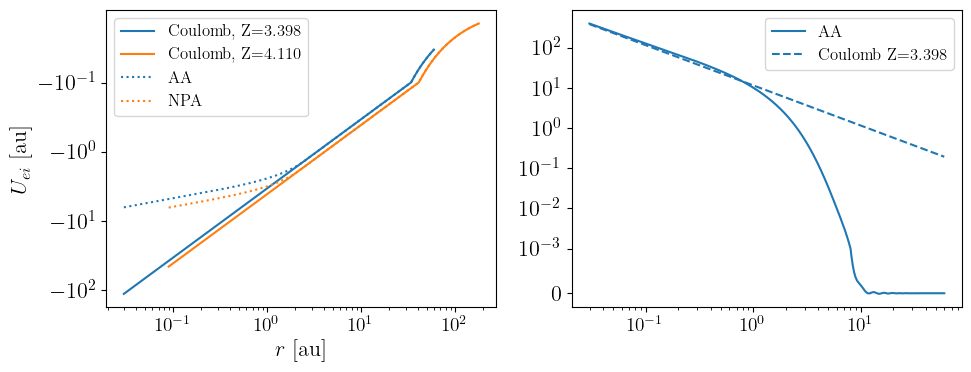

In [156]:
plt.rcParams["figure.figsize"] = (8,6)
plt.rcParams['font.size'] =  16
plt.rcParams['legend.fontsize'] = 12
# Plot and Compare
fig, axs = plt.subplots(1,2, figsize=(10,4))

colors = plt.rcParams['axes.prop_cycle'].by_key()['color']

axs[0].plot(aa_tfd.iet.r_array*rs, -aa_tfd.Zstar/(aa_tfd.iet.r_array*rs), color=colors[0], label=f"Coulomb, Z={aa_tfd.Zstar:0.3f}")
axs[0].plot(npa_tfd.iet.r_array*rs, -npa_tfd.Zstar/(npa_tfd.iet.r_array*rs),color=colors[1], label=f"Coulomb, Z={npa_tfd.Zstar:0.3f}")
axs[0].plot(aa_tfd.iet.r_array*rs, -aa_tfd.Uei_iet ,':',color=colors[0], label="AA" ) # Need to muultiply by some rs power???
axs[0].plot(npa_tfd.iet.r_array*rs, -npa_tfd.Uei_iet ,':',color=colors[1], label="NPA") # Need to muultiply by some rs power???


axs[0].set_yscale('symlog',linthresh=1e-1)
axs[0].set_xscale('log')
axs[0].set_xlabel(r"$r$ [au]")
axs[0].set_ylabel(r"$U_{ei}$ [au]")

axs[1].plot(aa_tfd.iet.r_array*rs, aa_tfd.uii_r_eff_iet, color=colors[0],linestyle='-', label='AA')
# axs[1].plot(aa_tfd.iet.r_array*rs, uii_test, color=colors[0],linestyle='-', label='AA test')
axs[1].plot(aa_tfd.iet.r_array*rs, aa_tfd.Zstar**2/(aa_tfd.iet.r_array*rs ), color=colors[0] ,linestyle='--', label=f'Coulomb Z={aa_tfd.Zstar:0.3f}')
# axs[1].plot(npa_tfd.iet.r_array*rs, npa_tfd.uii_r_eff_iet, color=colors[1],linestyle='-', label='NPA')
# axs[1].plot(npa_tfd.iet.r_array*rs, npa_tfd.Zstar**2/(npa_tfd.iet.r_array*rs ), color=colors[1],linestyle='--', label=f'Coulomb Z={npa_tfd.Zstar:0.3f}' )

axs[1].set_yscale('symlog',linthresh=1e-3)
axs[1].set_xscale('log')


for ax in axs:
    ax.legend()
plt.tight_layout()

In [133]:
npa_tfd.make_gii()
npa_tfd.make_ρi()

	-------------------
	Solving IET.
0: Initial condition Total Error: 9.962e-13
Exiting status 0, reverting to best index so far: 1
Final iter:2, Total Error: 9.884e-13


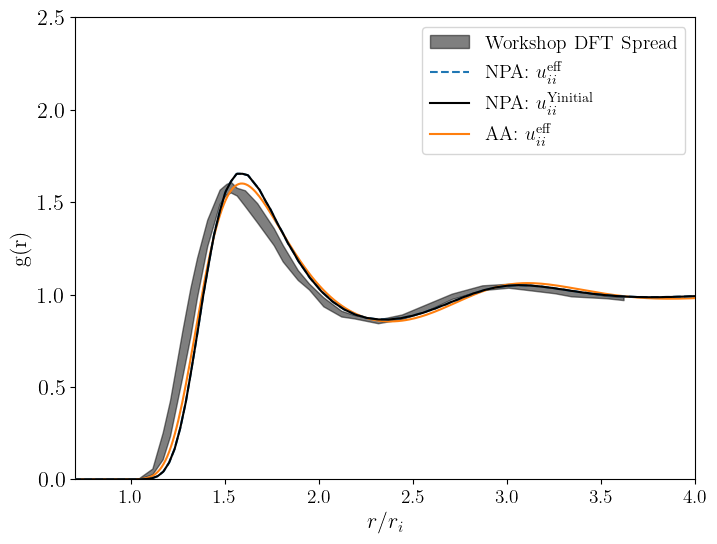

In [136]:
from scipy.interpolate import PchipInterpolator
from pandas import read_csv

fig, ax  = plt.subplots()

# Data from community TCCW
upper_data = read_csv("/home/zach/plasma/hnc/TCCW/Final_TCCW/Fig5c_Upper.txt", delim_whitespace=True, header=1)
lower_data = read_csv("/home/zach/plasma/hnc/TCCW/Final_TCCW/Fig5c_Lower.txt", delim_whitespace=True, header=1)

ax.fill_between(lower_data['r/ri'],lower_data['gii'], PchipInterpolator(upper_data['r/ri'], upper_data['gii'])(lower_data['r/ri']), alpha=0.5, color='k', label='Workshop DFT Spread')

# Average atom effective potential to gii
ax.plot(npa_tfd.iet.r_array, npa_tfd.iet.h_r_matrix[0,0] + 1,'--', label=r"NPA: $u_{ii}^{\rm eff}$", zorder=10)
ax.plot(npa_tfd.grid.xs/rs, npa_tfd.gii,'k-', label=r"NPA: $u_{ii}^{\rm Y initial}$", zorder=10)
ax.plot(aa_tfd.iet.r_array, aa_tfd.iet.h_r_matrix[0,0] + 1, label=r"AA: $u_{ii}^{\rm eff}$", zorder=5)

ax.set_xlabel(r"$r/r_i$")
ax.set_ylabel("g(r)")
ax.set_xlim(0.7,4)
ax.set_ylim(0,2.5)
ax.legend(fontsize=14)
